Working directory set to: c:\Users\RXCHC\OneDrive\Documents\GitHub\ascent
'ascent' folder added to sys.path: c:\Users\RXCHC\OneDrive\Documents\GitHub\ascent


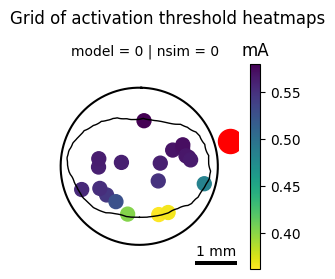

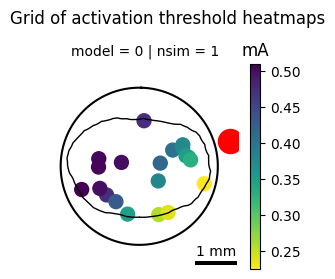

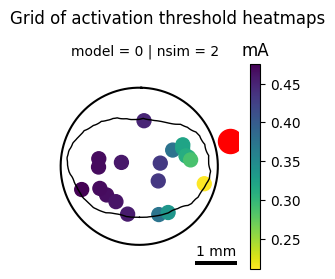

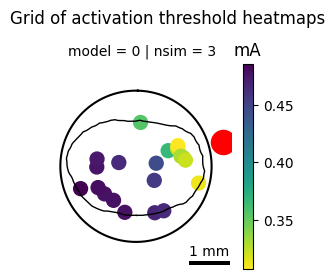

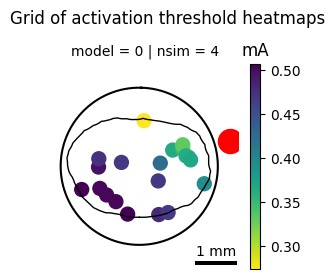

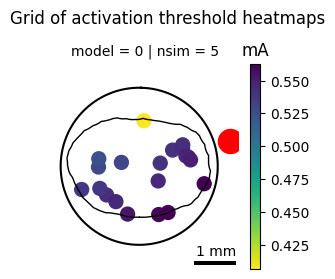

In [3]:
"""Generate a heatmap of activation thresholds.

The copyrights of this software are owned by Duke University.
Please refer to the LICENSE and README.md files for licensing instructions.
The source code can be found on the following GitHub repository: https://github.com/wmglab-duke/ascent.

Note: if more than one heatmap is desired, you must use a Seaborn FacetGrid.
RUN THIS FROM REPOSITORY ROOT
"""

import os
import sys

from notebook_setup import setup_notebook

# Call the setup function
setup_notebook()

import seaborn as sns
import matplotlib.pyplot as plt

from src.core.plotter import heatmaps
from src.core.query import Query
# Initialize and run Querys
q = Query(
    {
        'partial_matches': True,
        'include_downstream': True,
        'indices': {'sample': [2], 'model': [0], 'sim': [3]},
        'model_filters': [lambda m: isinstance(m.get('cuff'), dict)]  # Only use dict-type cuffs
    }
).run()

# Get threshold data
fdata = q.threshold_data()
filtered_data = fdata[fdata['threshold'].notna()]
unique_nsim_values = filtered_data['nsim'].unique()
# Specify keyword arguments to pass to heatmaps()
heatmap_kws = {'min_max_ticks': False, 'cuff_orientation': True}

for nsim_value in unique_nsim_values:
    filtered_data2 = filtered_data[filtered_data['nsim'] == nsim_value]

    # Build heatmap grid
    g = sns.FacetGrid(filtered_data2, row='model', col='nsim', sharex=False, sharey=False)
    g.map(heatmaps, *filtered_data2.columns, **heatmap_kws)
    
    # Title and clear axis labels
    plt.subplots_adjust(top=0.8)
    plt.suptitle('Grid of activation threshold heatmaps')
    for ax in g.axes.ravel():
        ax.set_xlabel('')
        ax.set_ylabel('')
    plt.show()
    save_directory = os.path.join('out', 'analysis')
    
    os.makedirs(save_directory, exist_ok=True)
    plt.savefig(os.path.join(save_directory, f'threshold_heatmap_grid_{nsim_value}.png'), dpi=400, bbox_inches='tight')
    plt.close()  # Close the figure to free up memory


